In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams["figure.figsize"] = (10,8)

import statsmodels.formula.api as smf


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train2.csv", index_col = 0)
df.head(2)

,depth,table,x,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
carat,,,,,,,,,,,,,,,,,,,,,
0.30,62.4,58.0,4.31,6.353,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1.01,62.7,56.0,6.42,9.183,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# Reparto de datos en train y test
# ==============================================================================
# Lo primero que hacemos es definir cuál es nuestra variable Y y nuestras variables X
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [4]:
print("Datos de entrenamiento")
print("-----------------------")
print(y_train.describe())



Datos de entrenamiento
-----------------------
count    32364.000000
mean         7.786349
std          1.018371
min          5.787000
25%          6.851000
50%          7.784000
75%          8.584000
max          9.842000
Name: price, dtype: float64


In [5]:
print("Datos de testeo")
print("-----------------------")
print(y_test.describe())

Datos de testeo
-----------------------
count    8091.000000
mean        7.773714
std         1.010634
min         5.814000
25%         6.851500
50%         7.761000
75%         8.572500
max         9.842000
Name: price, dtype: float64


In [6]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

CPU times: total: 0 ns
Wall time: 0 ns


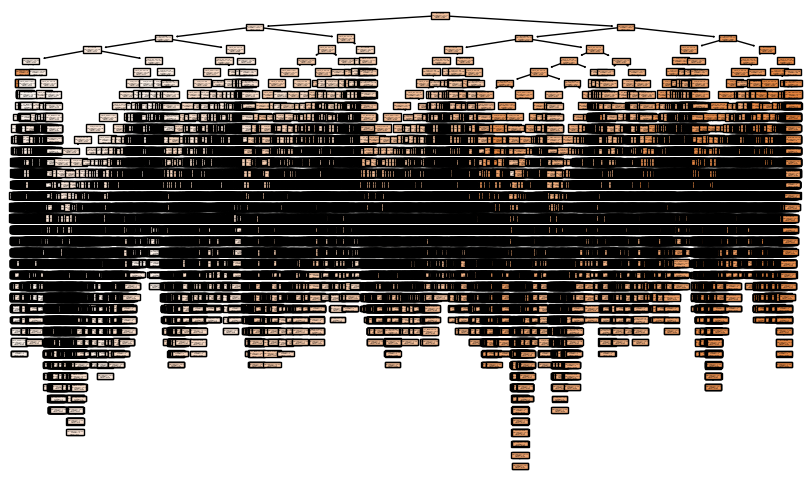

In [7]:
%time
fig = plt.figure(figsize=(10, 6))
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.show();

In [8]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features

4.795831523312719

In [9]:
# max depth

print(regressor.tree_.max_depth)

40


In [10]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [11]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df
    

In [12]:
# sacamos las métricas para ver si hay overfitting

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,0.105120,0.022199,0.148992,0.978263,test,Decission Tree I
1,0.000801,0.000070,0.008360,0.999933,train,Decission Tree I


In [13]:
# Generación del GridSearch
# ==============================================================================

# definimos un diccionario con los hiperparámetros que queremos testear. 
param = {"max_depth": [4, 5, 6, 7],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4,5,6]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=3,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [14]:
# ajustamos el modelo de nuevo

%time
gs.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV 1/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-1.029, test=-1.034) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.644, test=-0.632) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.836, test=-0.822) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.970, test=-0.989) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.277, test=-0.284) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.941, test=-0.954) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-1.025, test=-1.027) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=1, min_samples_split=10;,

[CV 1/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.985, test=-1.002) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.770, test=-0.766) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.958, test=-0.952) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.971, test=-0.997) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.248, test=-0.245) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.918, test=-0.936) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.970, test=-0.980) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.505, test=-0.501) total time=   0.0s
[CV 9/10] END max_depth=4, max_features=3, min_s

[CV 2/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.918, test=-0.922) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.273, test=-0.283) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.223, test=-0.231) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.757, test=-0.760) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.320, test=-0.321) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.971, test=-0.983) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.443, test=-0.439) total time=   0.0s
[CV 9/10] END max_depth=4, max_features=5, min_samples_split=100;, score=(train=-0.264, test=-0.260) total time=   0.0s
[CV 10/10] END max_depth=4, max_features

[CV 8/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.938, test=-0.940) total time=   0.0s
[CV 9/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.883, test=-0.869) total time=   0.0s
[CV 10/10] END max_depth=5, max_features=2, min_samples_split=10;, score=(train=-0.634, test=-0.618) total time=   0.0s
[CV 1/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-1.008, test=-1.012) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.939, test=-0.935) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.215, test=-0.220) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.289, test=-0.296) total time=   0.0s
[CV 5/10] END max_depth=5, max_features=2, min_samples_split=50;, score=(train=-0.849, test=-0.853) total time=   0.0s
[CV 6/10] END max_depth=5, max_features=2, min_

[CV 10/10] END max_depth=5, max_features=4, min_samples_split=50;, score=(train=-0.139, test=-0.142) total time=   0.0s
[CV 1/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.670, test=-0.652) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.149, test=-0.150) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.911, test=-0.908) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.956, test=-0.973) total time=   0.0s
[CV 5/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.671, test=-0.677) total time=   0.0s
[CV 6/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.196, test=-0.195) total time=   0.0s
[CV 7/10] END max_depth=5, max_features=4, min_samples_split=100;, score=(train=-0.418, test=-0.440) total time=   0.0s
[CV 8/10] END max_depth=5, max_features=

[CV 10/10] END max_depth=5, max_features=6, min_samples_split=100;, score=(train=-0.580, test=-0.565) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.805, test=-0.808) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.944, test=-0.940) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.977, test=-0.975) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.422, test=-0.434) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.211, test=-0.206) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.970, test=-0.983) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=1, min_samples_split=10;, score=(train=-0.950, test=-0.963) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=1, min

[CV 9/10] END max_depth=6, max_features=3, min_samples_split=10;, score=(train=-0.522, test=-0.500) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=3, min_samples_split=10;, score=(train=-0.610, test=-0.602) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.270, test=-0.271) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.716, test=-0.728) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.310, test=-0.308) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.807, test=-0.831) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.929, test=-0.921) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=3, min_samples_split=50;, score=(train=-0.157, test=-0.156) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=3, min_

[CV 9/10] END max_depth=6, max_features=5, min_samples_split=50;, score=(train=-0.169, test=-0.170) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=5, min_samples_split=50;, score=(train=-0.653, test=-0.642) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.166, test=-0.168) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.197, test=-0.198) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.680, test=-0.668) total time=   0.0s
[CV 4/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.220, test=-0.226) total time=   0.0s
[CV 5/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.189, test=-0.184) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=5, min_samples_split=100;, score=(train=-0.200, test=-0.206) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=5

[CV 8/10] END max_depth=7, max_features=1, min_samples_split=100;, score=(train=-0.808, test=-0.801) total time=   0.0s
[CV 9/10] END max_depth=7, max_features=1, min_samples_split=100;, score=(train=-0.767, test=-0.774) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=1, min_samples_split=100;, score=(train=-0.835, test=-0.840) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=2, min_samples_split=10;, score=(train=-0.881, test=-0.903) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=2, min_samples_split=10;, score=(train=-0.655, test=-0.694) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=2, min_samples_split=10;, score=(train=-0.784, test=-0.780) total time=   0.0s
[CV 4/10] END max_depth=7, max_features=2, min_samples_split=10;, score=(train=-0.726, test=-0.766) total time=   0.0s
[CV 5/10] END max_depth=7, max_features=2, min_samples_split=10;, score=(train=-0.705, test=-0.700) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=2, m

[CV 2/10] END max_depth=7, max_features=4, min_samples_split=50;, score=(train=-0.618, test=-0.609) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=4, min_samples_split=50;, score=(train=-0.483, test=-0.506) total time=   0.0s
[CV 4/10] END max_depth=7, max_features=4, min_samples_split=50;, score=(train=-0.886, test=-0.927) total time=   0.0s
[CV 5/10] END max_depth=7, max_features=4, min_samples_split=50;, score=(train=-0.517, test=-0.527) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=4, min_samples_split=50;, score=(train=-0.172, test=-0.179) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=4, min_samples_split=50;, score=(train=-0.544, test=-0.539) total time=   0.0s
[CV 8/10] END max_depth=7, max_features=4, min_samples_split=50;, score=(train=-0.698, test=-0.709) total time=   0.0s
[CV 9/10] END max_depth=7, max_features=4, min_samples_split=50;, score=(train=-0.253, test=-0.259) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=4, min_

[CV 5/10] END max_depth=7, max_features=6, min_samples_split=100;, score=(train=-0.080, test=-0.082) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=6, min_samples_split=100;, score=(train=-0.363, test=-0.360) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=6, min_samples_split=100;, score=(train=-0.167, test=-0.178) total time=   0.0s
[CV 8/10] END max_depth=7, max_features=6, min_samples_split=100;, score=(train=-0.219, test=-0.228) total time=   0.0s
[CV 9/10] END max_depth=7, max_features=6, min_samples_split=100;, score=(train=-0.211, test=-0.213) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=6, min_samples_split=100;, score=(train=-0.190, test=-0.190) total time=   0.0s


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [15]:
# sacamos cual es el mejor de todos los que hemos testeado usando el método best_estimator_

best_tree = gs.best_estimator_
best_tree

DecisionTreeRegressor(max_depth=7, max_features=6, min_samples_split=100)

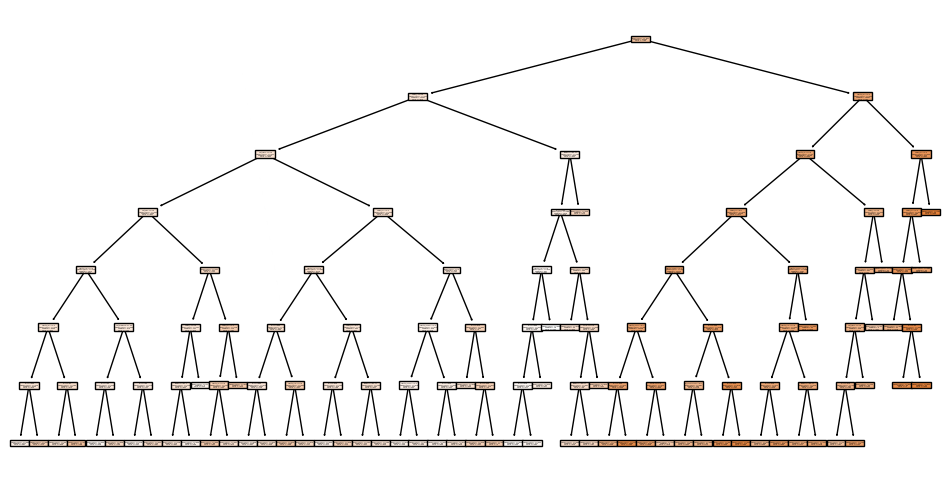

In [16]:
# volvamos a intentar visualizar el árbol a ver como se ve: 

fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree, feature_names=X_train.columns, filled=True);



In [17]:
 #guardamos la imagen 

fig.savefig("decision_tree.png", facecolor="white")

In [18]:
print(tree.export_text(best_tree, feature_names= list(X_train.columns)))

|--- y <= 5.58
|   |--- y <= 4.92
|   |   |--- x <= 4.62
|   |   |   |--- clarity_encoded <= 4.50
|   |   |   |   |--- color_encoded <= 2.50
|   |   |   |   |   |--- x <= 4.39
|   |   |   |   |   |   |--- clarity_encoded <= 2.50
|   |   |   |   |   |   |   |--- value: [6.12]
|   |   |   |   |   |   |--- clarity_encoded >  2.50
|   |   |   |   |   |   |   |--- value: [6.24]
|   |   |   |   |   |--- x >  4.39
|   |   |   |   |   |   |--- clarity_encoded <= 2.50
|   |   |   |   |   |   |   |--- value: [6.25]
|   |   |   |   |   |   |--- clarity_encoded >  2.50
|   |   |   |   |   |   |   |--- value: [6.38]
|   |   |   |   |--- color_encoded >  2.50
|   |   |   |   |   |--- x <= 4.24
|   |   |   |   |   |   |--- y <= 4.17
|   |   |   |   |   |   |   |--- value: [6.09]
|   |   |   |   |   |   |--- y >  4.17
|   |   |   |   |   |   |   |--- value: [6.27]
|   |   |   |   |   |--- x >  4.24
|   |   |   |   |   |   |--- x <= 4.40
|   |   |   |   |   |   |   |--- value: [6.47]
|   |   |   |   | 

In [20]:
y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)

In [21]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")

In [22]:
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,0.270130,0.126105,0.355112,0.87652,test,Decision tree II
1,0.268808,0.124404,0.352710,0.88004,train,Decision tree II


# prueba predicciones 

In [23]:
df = pd.read_csv("test2.csv", index_col = 0)
X_realida = df


In [24]:
X_realida_submision = best_tree.predict(X_realida)
X_realida_submision

array([6.38238376, 8.30785832, 9.28573302, ..., 6.66087515, 9.28573302,
       8.30785832])

In [25]:
submision1 = pd.DataFrame(X_realida_submision)
submision1.reset_index(inplace=True)
submision1.rename(columns={"index":"id",0:"price"}, inplace =True)
submision1

,id,price
0,0,6.382384
1,1,8.307858
2,2,9.285733
3,3,8.307858
4,4,8.885803
...,...,...
13480,13480,8.307858
13481,13481,8.307858
13482,13482,6.660875
13483,13483,9.285733


In [26]:
submision1.to_csv("df_submision2.csv", index=False)